## Pravin Patil - Statistics PML Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [4]:
from numpy import mean, median


dhoni=np.loadtxt('../data/dhoni.txt') 
gambhir=np.loadtxt('../data/gambhir.txt') 
kapil=np.loadtxt('../data/kapil_dev.txt')
kohli=np.loadtxt('../data/kohli.txt')
sehwag=np.loadtxt('../data/sehwag.txt')
rohit=np.loadtxt('../data/rohit.txt')
sachin=np.loadtxt('../data/sachin.txt')

names=['dhoni','gambhir','kapil','kohli','sehwag','rohit','sachin']
means=[mean(dhoni),mean(gambhir),mean(kapil),mean(kohli),mean(sehwag),mean(rohit),mean(sachin)]
medians=[median(dhoni),median(gambhir),median(kapil),median(kohli),median(sehwag),median(rohit),median(sachin)]
modes=[pd.Series(dhoni).mode()[0],pd.Series(gambhir).mode()[0],pd.Series(kapil).mode()[0],pd.Series(kohli).mode()[0],pd.Series(sehwag).mode()[0],pd.Series(rohit).mode()[0],pd.Series(sachin).mode()[0]]

means,medians,modes;

0.3141592920353983


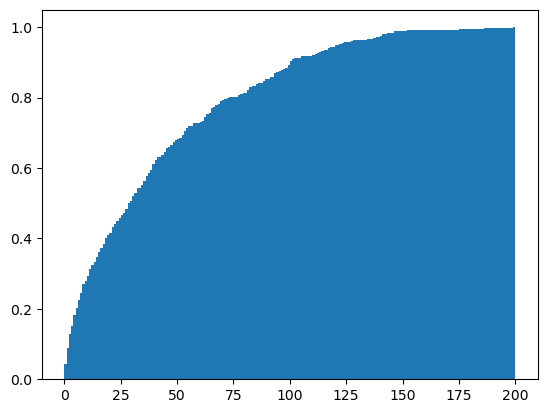

In [8]:
c,b,p= plt.hist(sachin, bins=range(201),cumulative=True,density=True);
print(c[11])

In [ ]:

#Part 1 answer

map ={"sachin":sachin,"kohli":kohli,"dhoni":dhoni,"sehwag":sehwag,"rohit":rohit,"kapil":kapil,"gambhir":gambhir,"All":[dhoni, gambhir, kapil, kohli, sehwag, rohit, sachin]}

@interact(batsman=[ i for i in map], plotType=["Histogram","Boxplot","Violin"],bins=['auto','fd','doane','scott','stone','rice','sturges','sqrt',5,10,15,20,25,30])
def showPlot(batsman,plotType,bins):
    #print(batsman,plotType,bins)
    if batsman not in map:
        print("No data")
        return  
    
    data=map[batsman]
   # print(max(data))
    
    if plotType=="Histogram":
      plt.hist(data, bins=bins,label=batsman,density=True, edgecolor='black',align='left');
      plt.xlabel('Runs')
      plt.legend()
    elif plotType=="Boxplot":
        plt.boxplot(data, vert=True)
    elif plotType=="Violin":
        plt.violinplot(data, vert=True, showmeans=False, showmedians=True)


interactive(children=(Dropdown(description='batsman', options=('sachin', 'kohli', 'dhoni', 'sehwag', 'rohit', …

#Part 2

Write a function that returns the PMF for a batsman's data given their scores as a numpy array.

Write another function that finds the cumulative distribution values.

Write a function to compute probabilities in a range (a, b) given the PMF/CDF. You can consider a function that is given the PMF data (either CDF/PMF/PDF) and the two limits of the range, for example: probability(batsman_data, a, b), where "a, b" are the limits of the range

Use these functions and also suitable statistical plots to analyse the performance of at least 3 different batsmen from the data given to you. Make some conclusions about the batsmen based on this. 

PMF .. Runs, Probability
1 , 0.6667
2 , 0.1667
5 , 0.1667
 CDF .. Runs, Cumulative Probability
1 , 0.6667
2 , 0.8333
5 , 1.0000
Probability that Bastman scores between 1 and 4: 0.8333
0.16666666666666674


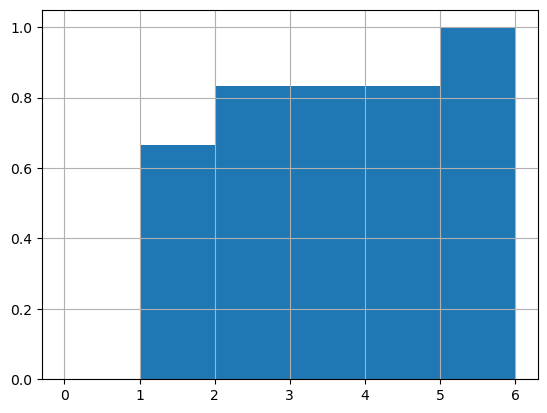

In [11]:
#Write a function that returns the PMF for a batsman's data given their scores as a numpy arra


#data1=sachin
data1=[1,1,1,1,2,5]
def pmf(data):
    values, counts = np.unique(data, return_counts=True)
    prob = counts / counts.sum()
    return values, prob


values, prob = pmf(data1)
print("PMF .. Runs, Probability")
for i in range(len(values)):
    print(f"{values[i]} , {prob[i]:.4f}")


#calculate CDF
def cdf(data):
    values, prob = pmf(data)
    cum_prob = np.cumsum(prob)
    return values, cum_prob


values, cum_prob = cdf(data1)
print(" CDF .. Runs, Cumulative Probability")
for i in range(len(values)):
    print(f"{values[i]} , {cum_prob[i]:.4f}")
    
def probability_in_range(values, probs, a, b):
    mask = (values >= a) & (values <= b)
   # print(mask)
    return probs[mask].sum()


values, pmf_vals = pmf(data1)
a,b=1,4
prob = probability_in_range(values, pmf_vals, a,b)
print(f"Probability that Bastman scores between {a} and {b}: {prob:.4f}")


c,b,p= plt.hist(data1, bins=range(len(data1)+1),cumulative=True,density=True);
plt.grid()
print(1- c[2])


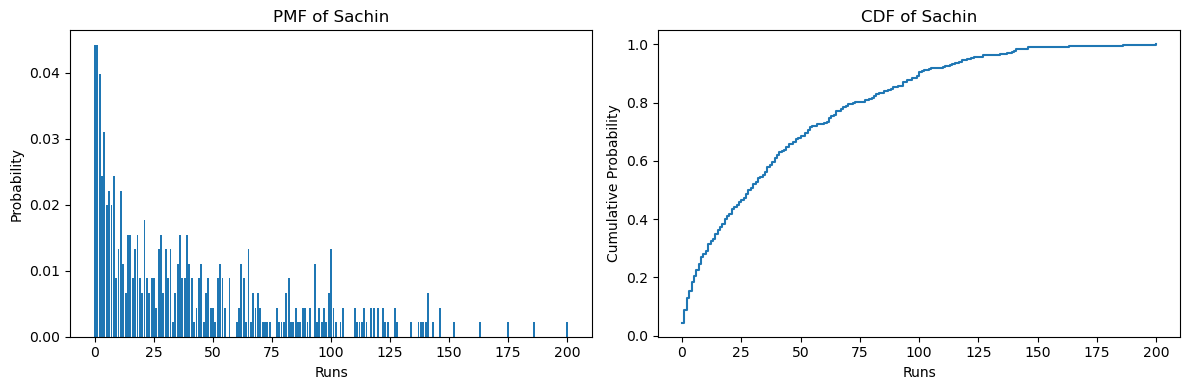

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
Probability that Sachin scores between 30 and 70 runs: 0.28761


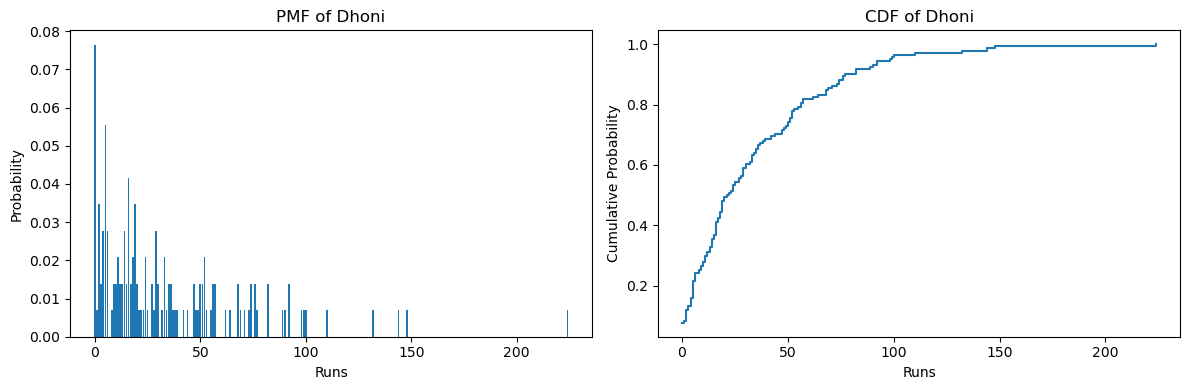

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False]
Probability that Dhoni scores between 30 and 70 runs: 0.26389


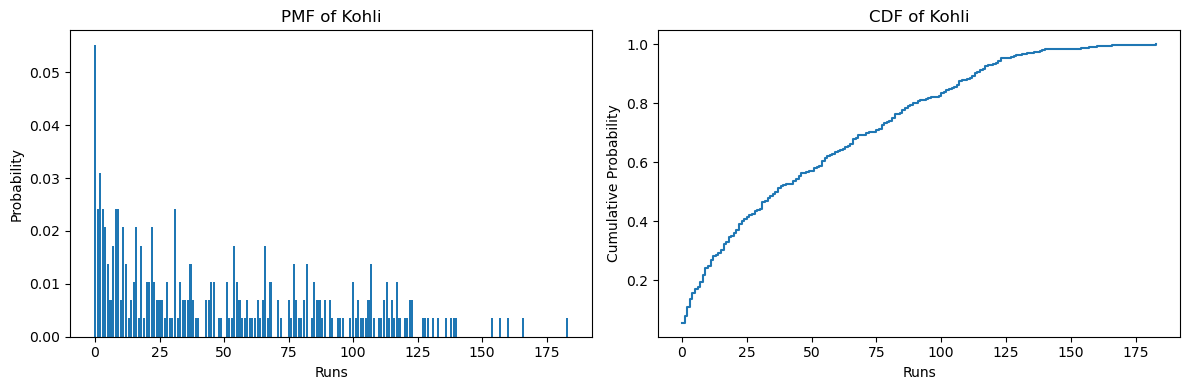

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Probability that Kohli scores between 30 and 70 runs: 0.25517


: 

In [ ]:
batsmen = {'Sachin': sachin, 'Dhoni': dhoni, 'Kohli': kohli}

for name, data in batsmen.items():
    # PMF and CDF
    values, pmf_vals = pmf(data)
    _, cdf_vals = cdf(data)
    
    # Plot PMF
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(values, pmf_vals)
    plt.title(f'PMF of {name}')
    plt.xlabel('Runs')
    plt.ylabel('Probability')
    
    # Plot CDF
    plt.subplot(1,2,2)
    plt.step(values, cdf_vals, where='post')
    plt.title(f'CDF of {name}')
    plt.xlabel('Runs')
    plt.ylabel('Cumulative Probability')
    plt.tight_layout()
    plt.show()
    
    # Probability in range 30 to 70
    prob_30_70 = probability_in_range(values, pmf_vals, 30, 70)
    print(f"Probability that {name} scores between 30 and 70 runs: {prob_30_70:.5f}")

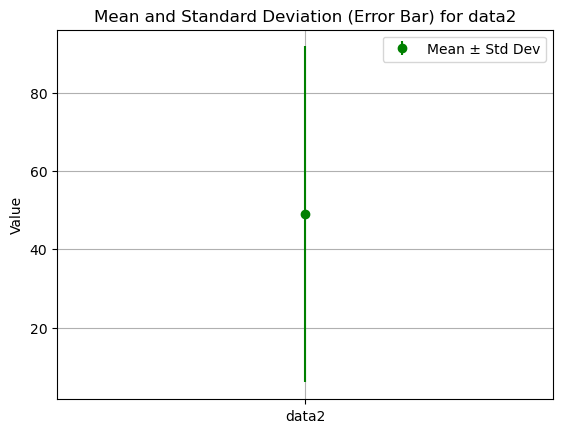

In [ ]:
data2 =kohli
mean_val = np.mean(data2)
std_val = np.std(data2, ddof=1)

plt.errorbar(
    x=[1], 
    y=[mean_val], 
    yerr=[std_val], 
    fmt='o', f
    color='green', 
    label='Mean ± Std Dev'
)
plt.xticks([1], ['data2'])
plt.ylabel('Value')
plt.title('Mean and Standard Deviation (Error Bar) for data2')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
data = [1, 2, 2, 3, 4, 4, 4,2,2,2, 5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]
values, counts = np.unique(data, return_counts=True)


max=0
for i in range(len(counts)):
    if counts[i]>max:
        max=counts[i]
   
print("Max count ",  max)

for i in range(len(counts)):
    if counts[i]==max:
        print("Mode:", values[i])


# Simplified way to find mode using numpy
mode = values[counts.argmax()]
print("Mode  ff :", mode)


Max count  20
Mode: 4
Mode  ff : 4


np.float64(2050.0)

In [71]:
convolve1d(data,kernel,2)

i 0
[1 2 3]
Sum  0.5
Sum  1.5
Sum  3.0
i 2
[3 4 5]
Sum  1.5
Sum  3.5
Sum  6.0


[np.float64(0.5),
 np.float64(1.5),
 np.float64(3.0),
 np.float64(1.5),
 np.float64(3.5),
 np.float64(6.0)]